<a href="https://colab.research.google.com/github/jevabrir/Taller_Python_IngIndustrial/blob/main/Taller_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

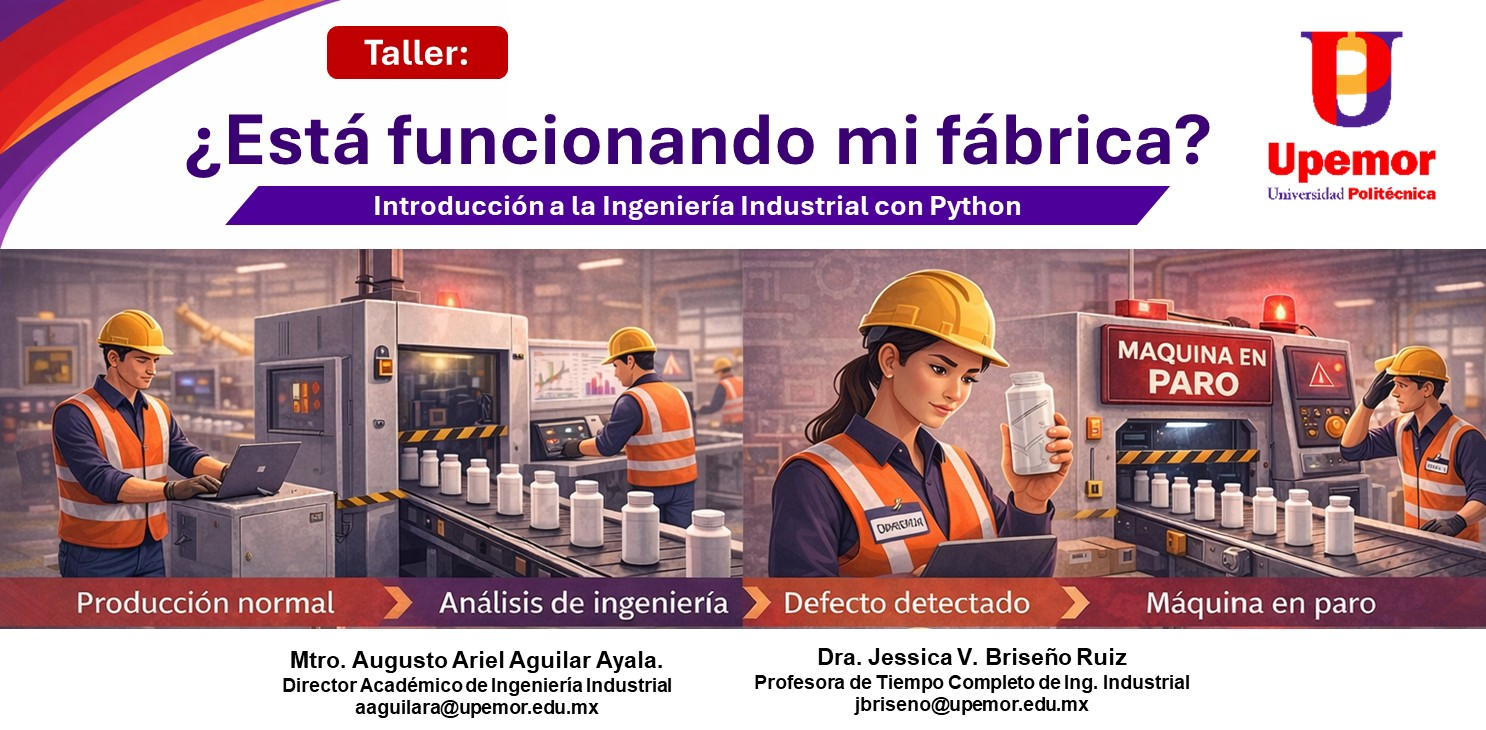

##**Objetivo del Taller**  

*  Analizar datos en un contexto industrial.  
*  Identificar factores que impactan el desempeño.
*  Interpretar gráficos y relaciones entre variables.
*  Desarrollar pensamiento analítico basado en evidencia


##**Contexto del Problema**  

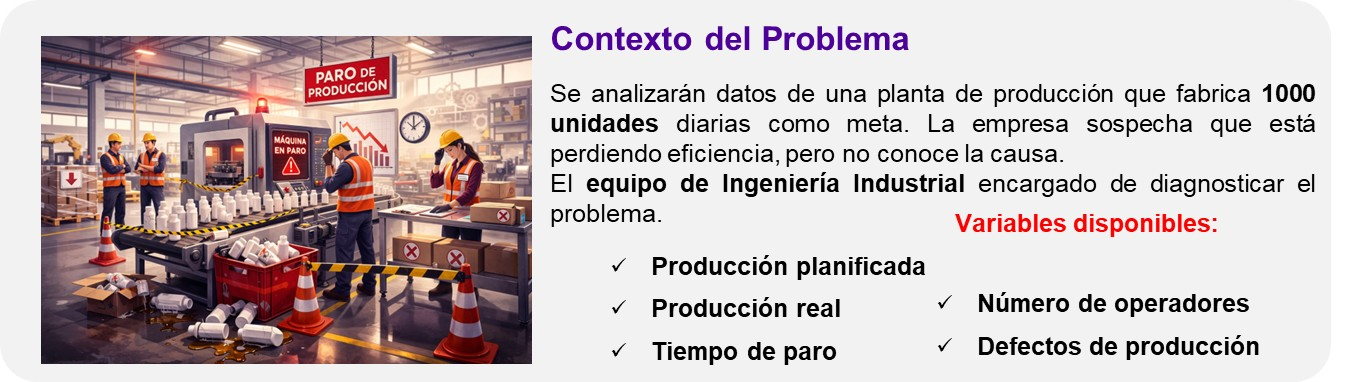

##**Análisis**  

####**1. Librerías de Python**

Ejecuta el código siguiente para cargas las liberías de Python

In [ ]:
import pandas as pd     # librería para manipulación y análisis de datos
import numpy as np      # librería para operaciones numéricas y manejo de arreglos
import matplotlib.pyplot as plt   # librería para creación de gráficas
pd.options.display.float_format = '{:.2f}'.format   # configura pandas para mostrar números con 2 decimales

####**2. Obtención de Datos de Producción**

In [ ]:
# @title Código para generar datos de producción
np.random.seed(42)

dias = 20
plan = 1000

# Generar variables base
tiempo_paro = np.random.randint(5, 70, dias)
operadores = np.random.choice([3,4,5], dias, p=[0.2,0.3,0.5])

# Modelo realista de producción
# Producción depende negativamente del tiempo de paro
# y positivamente del número de operadores

produccion_base = (
    plan
    - (tiempo_paro * 5)          # cada min de paro reduce 5 unidades
    + (operadores * 15)          # más operadores ayudan
)

# Agregamos variabilidad controlada
produccion_real = produccion_base + np.random.normal(0, 20, dias)

# Limitar valores lógicos
produccion_real = np.clip(produccion_real, 750, 1000)

# Defectos proporcionales a producción (2% a 6%)
defectos = produccion_real * np.random.uniform(0.02, 0.06, dias)

data = pd.DataFrame({
    "Dia": range(1, dias+1),
    "Produccion_Plan": plan,
    "Tiempo_Paro": tiempo_paro,
    "Operadores": operadores,
    "Produccion_Real": produccion_real.astype(int),
    "Defectos": defectos.astype(int)
})

Escribe línea de código **data.head(5)** para ver los primeros cinco renglones del dataset **data**

In [ ]:
 # Escribe aquí el código


data.head(5)

Escribe línea de código **data.shape** para ver el tamaño del dataset **data**. (Renglones,Columnas)

In [ ]:
# Escribe aquí el código

data.shape



Escribe línea de código **data["Produccion_Plan"]** para ver el los datos de la columna **Produccion_Plan** del dataset **data**.

In [ ]:
# Escribe aquí el código


data["Produccion_Plan"].head(5)

####**3. Cálculo de Indicadores (KPIs)**

Escribe línea de código **data.columns** para el nombre de cada columna del dataset **data**.

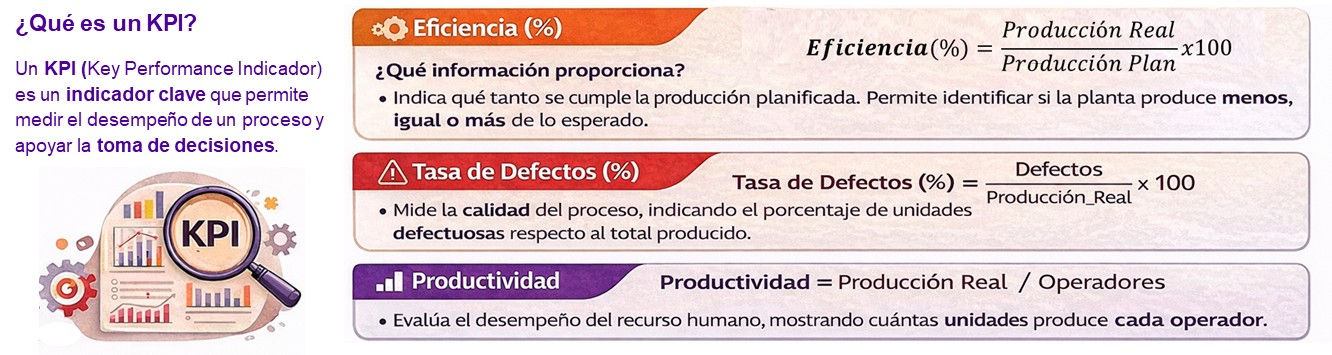

Escribe las siguientes líneas de código calcular los tres KPis en el dataset **data**.  

*  Eficiencia (%)  
*  Tasa_Defectos (%)  
*  Productividad   

**data["Eficiencia (%)"] = data["Produccion_Real"] / data["Produccion_Plan"] * 100  
data["Tasa_Defectos (%)"] = data["Defectos"] / data["Produccion_Real"] * 100  
data["Productividad"] = data["Produccion_Real"] / data["Operadores"]  
data.head(5)**

In [ ]:
# Escribe aquí el código

data["Eficiencia (%)"] = data["Produccion_Real"] / data["Produccion_Plan"] * 100
data["Tasa_Defectos (%)"] = data["Defectos"] / data["Produccion_Real"] * 100
data["Productividad"] = data["Produccion_Real"] / data["Operadores"]
data.head(5)



####**4. Cálculo de Estadísticos**

Escribe las siguientes líneas de código para imprimir un texto y calcular los principales estadísticos del dataset **data**.

**print("\n Resumen estadístico")**  
**data.describe().T**

In [ ]:
# Escribe aquí el código
print("\n Resumen estadístico")
data.describe().T



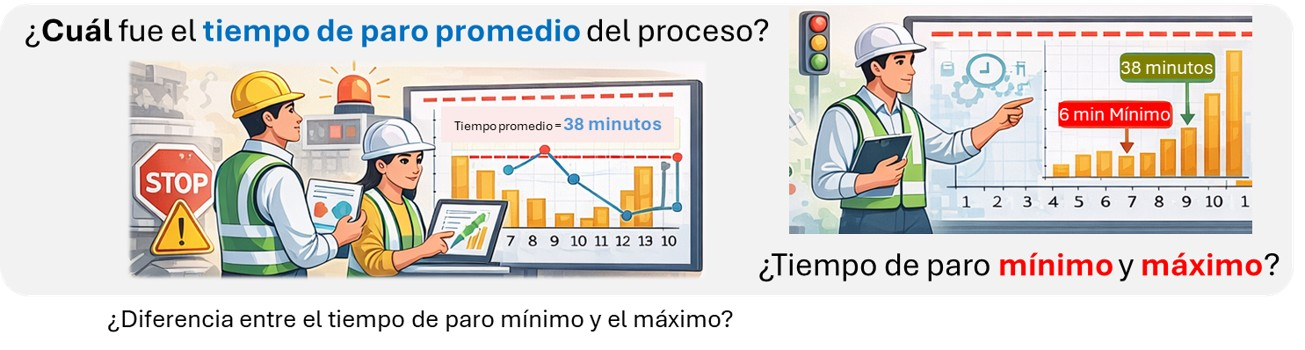

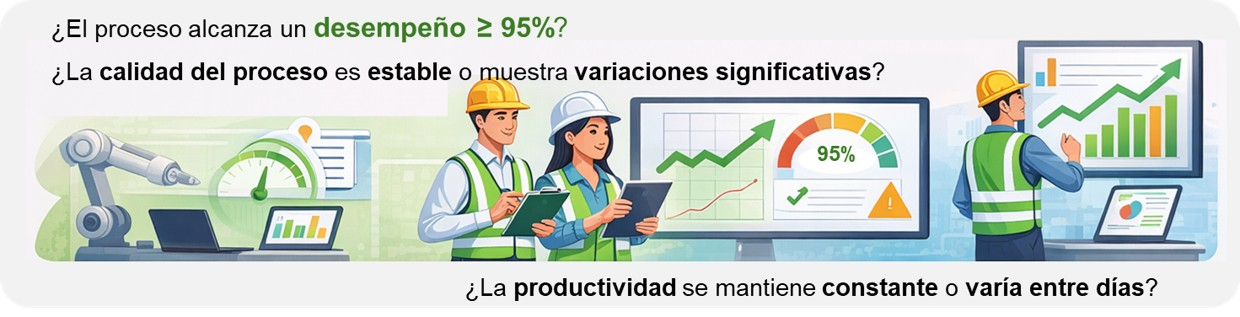

####**5. Visualización de datos**

#####**5.1 Gráfica de Producción Real vs. Producción Planeada**  

Ejecuta las siguientes líneas de código para generar la gráfica de **Producción Planeada vs. Producción Real**  
El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
# Crea la figura con tamaño (ancho, alto en pulgadas)
plt.figure(figsize=(11, 3))

# Gráfica: Eje X, Eje Y, 'o' agrega puntos visibles, etiqueta
plt.plot(data["Dia"],data["Produccion_Real"],marker='o',label="Producción Real")

# Línea horizontal que representa la producción planeada (meta):
plt.axhline(
    y=1000,           # y=1000 indica el valor objetivo de producción
    linestyle='--',   # linestyle='--' define una línea discontinua
    linewidth=3,      # linewidth=3 hace la línea más gruesa
    color='red',      # color='red' la diferencia visualmente de la producción real
    label="Producción Plan (Meta)")   #etiqueta

plt.title("Producción Real vs. Plan")   # Título de la gráfica
plt.xlabel("Día")                       # Etiqueta del eje X
plt.ylabel("Producción (unidades)")     # Etiqueta del eje Y
plt.xticks(range(1, 21))                # Etiquetas Eje X del 1 al 20
plt.legend()                            # leyenda identificar cada línea
plt.grid(alpha=0.2)                     # Activa Grid

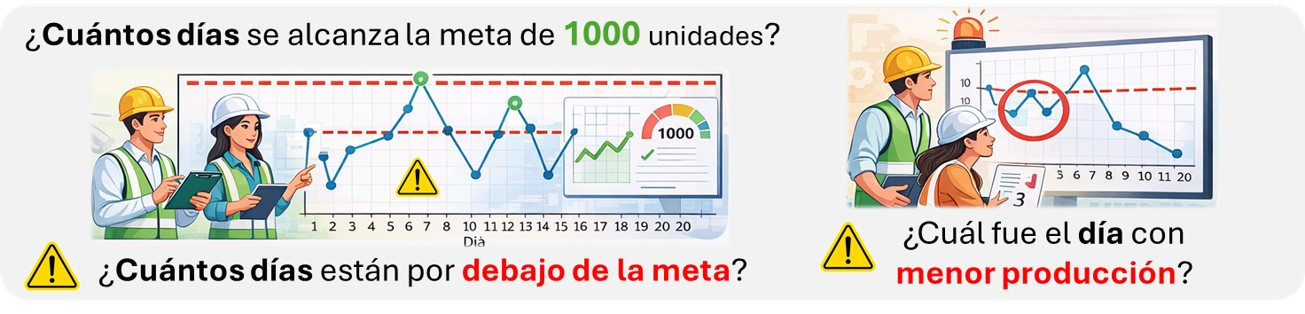

#####**5.2 Gráfica de Defectos por día**  

Ejecuta las siguientes líneas de código para generar la gráfica de **Defectos por día**  
El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
# Código: Creación de la gráfica "Defectos por Día"

# Crea la figura con tamaño (ancho, alto en pulgadas)
plt.figure(figsize=(10, 3))

# Gráfica de barras: Eje X, Eje Y, color azul
bars = plt.bar(data["Dia"],data["Defectos"],color="royalblue")

plt.title("Defectos por Día", fontsize=12)   # Título de la gráfica
plt.xlabel("Día")                            # Etiqueta del eje X
plt.ylabel("Número de Defectos")             # Etiqueta del eje Y
plt.xticks(range(1, len(data) + 1))          # Etiquetas del eje X según número de días
plt.grid(axis='y', alpha=0.3)                # Activa la cuadrícula solo en eje Y

# Agrega el valor numérico encima de cada barra
for bar in bars:
    height = bar.get_height()                # Obtiene la altura de la barra
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # Posición horizontal centrada
        height + 0.5,                        # Posición vertical ligeramente arriba
        f'{int(height)}',                    # Valor del número de defectos
        ha='center', va='bottom', fontsize=8 # Alineación y tamaño del texto
    )

plt.tight_layout()                           # Ajusta automáticamente los espacios

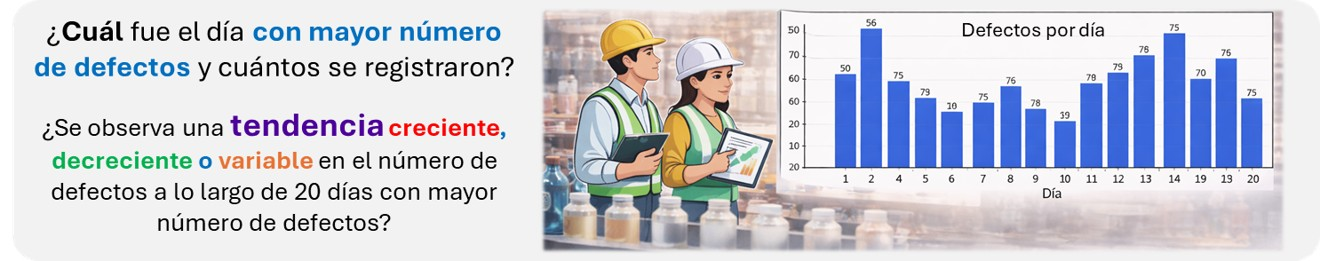

#####**5.3 Gráfica de Eficiencia(%) vs Tiempo de Paro (min)**  

Ejecuta las siguientes líneas de código para generar la gráfica de **Defectos por día**  
El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
plt.figure(figsize=(11, 3))  # Crea la figura con tamaño (ancho, alto en pulgadas)

# Gráfica de dispersión: Eje X, Eje Y, alpha controla la transparencia
plt.scatter(data["Tiempo_Paro"], data["Eficiencia (%)"], alpha=0.7)

plt.title("Tiempo de Paro vs. Eficiencia")   # Título de la gráfica
plt.xlabel("Tiempo de Paro (min)")            # Etiqueta del eje X
plt.ylabel("Eficiencia (%)")                  # Etiqueta del eje Y
plt.grid(alpha=0.3)                           # Activa la cuadrícula con transparencia

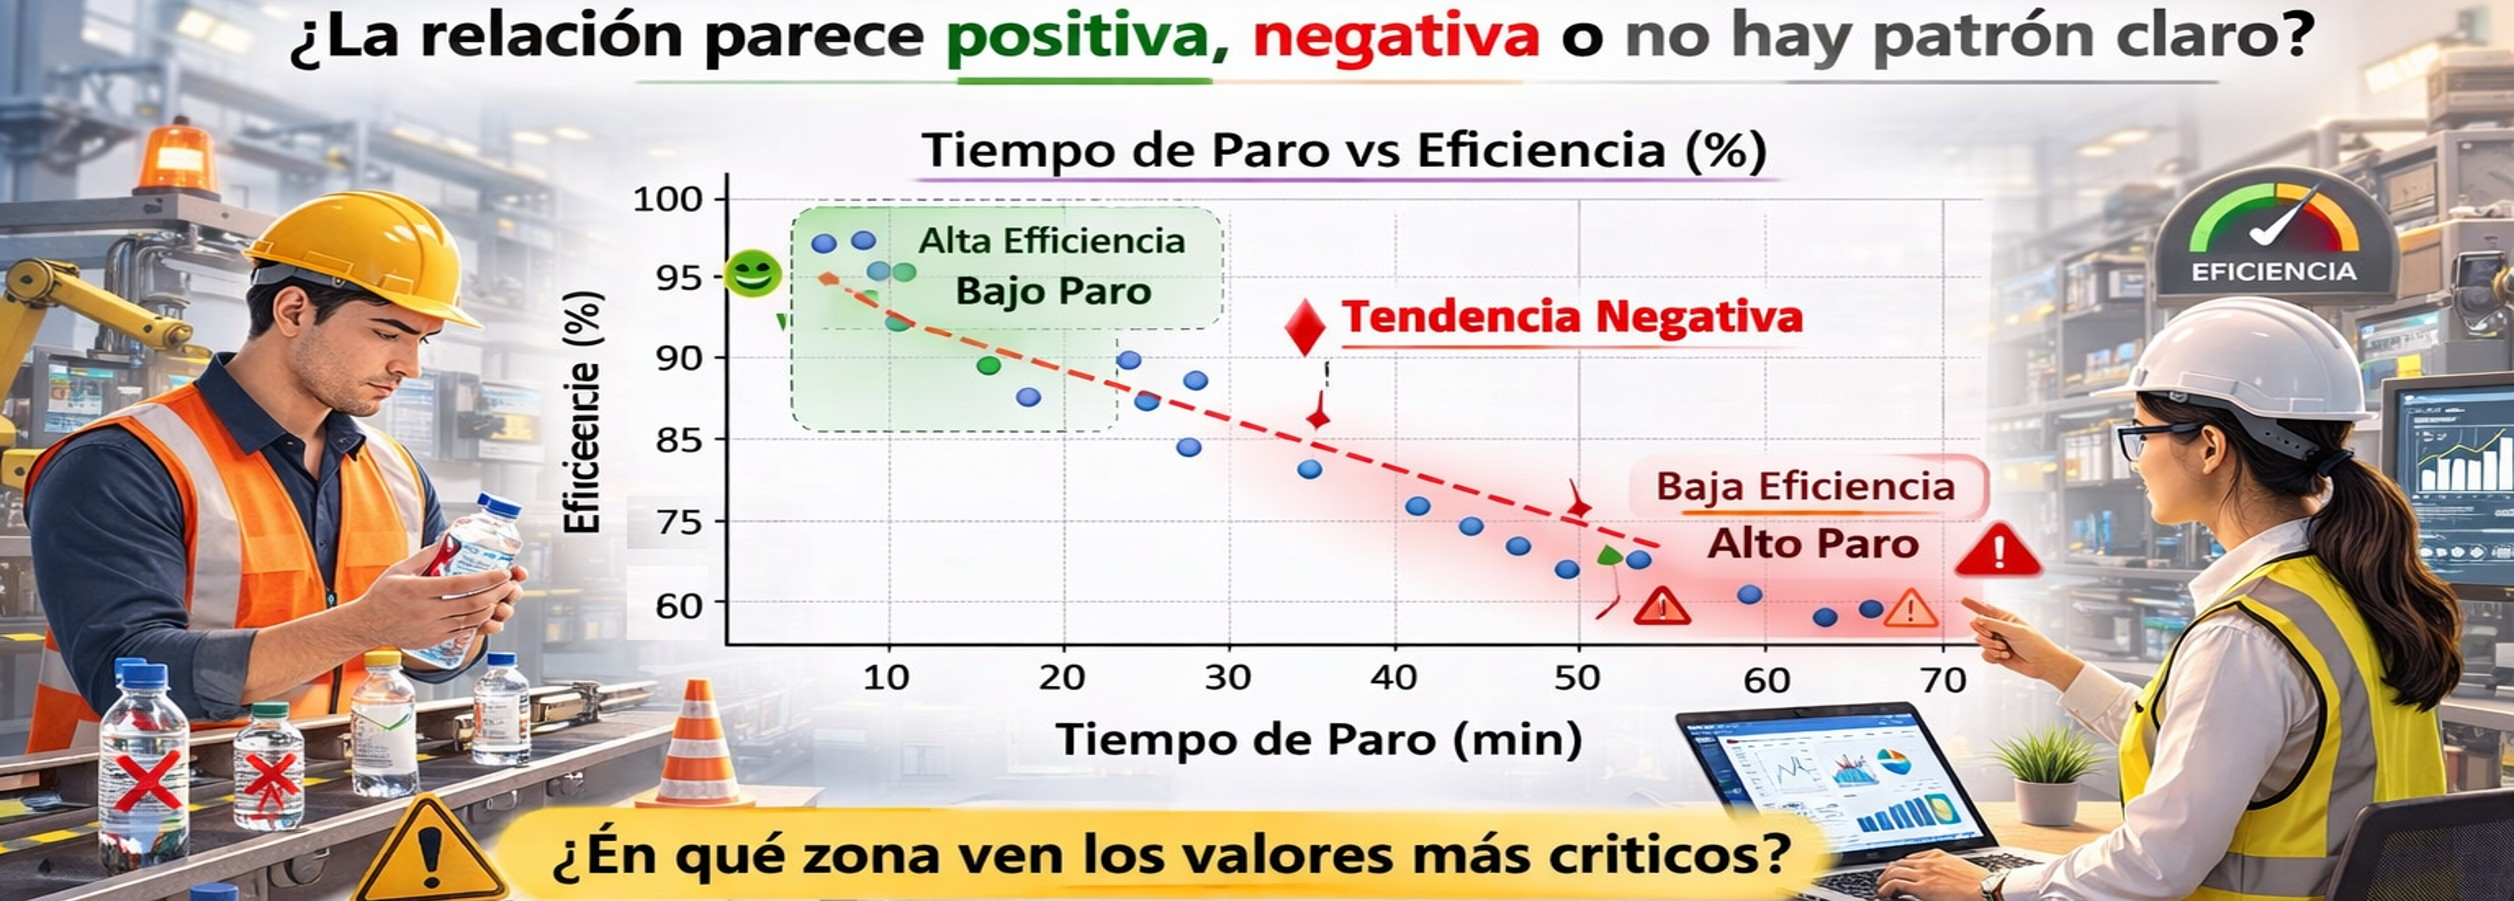

####**6. Análisis de Tendencia y Predicción**  

Ejecuta las siguientes líneas de código para la creación del:  

*  **Modelo lienal para estimación de la Eficiencia(%)**

El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
# Cálculo del modelo lineal Tiempo de Paro vs. Eficiencia

# Regresión lineal: m = pendiente , b = intercepto
m, b = np.polyfit(
    data["Tiempo_Paro"],        # Variable independiente (X)
    data["Eficiencia (%)"],     # Variable dependiente (Y)
    1)                          # Grado 1: modelo lineal

# Calcular correlación y coeficiente de determinación R²
correlacion = data["Tiempo_Paro"].corr(data["Eficiencia (%)"])
r2 = correlacion**2

# Imprimir la ecuación del modelo y R²
print("Modelo lineal estimado:")
print(f"Eficiencia = {m:.2f} * Tiempo_Paro + {b:.2f}")
print(f"R² = {r2:.3f}")

Ejecuta las siguientes líneas de código para la creación de la **Gráfica de "Tiempo de Paro vs Eficiencia (%) con el modelo".**

El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
plt.figure(figsize=(11, 3.5))    # Crea la figura con tamaño (ancho, alto en pulgadas)

# Gráfica de dispersión: Eje X, Eje Y, etiqueta
plt.scatter(data["Tiempo_Paro"],data["Eficiencia (%)"],alpha=0.7,
    label="Datos reales")

# Genera valores ordenados de X para una línea suave
x_vals = np.linspace(data["Tiempo_Paro"].min(),data["Tiempo_Paro"].max(),100)

# Calcula los valores estimados usando el modelo
y_vals = m * x_vals + b

# Dibuja la línea de tendencia
plt.plot(x_vals,y_vals,linewidth=3,label="Línea de tendencia")

# Identifica días críticos con eficiencia menor al 95%
criticos = data[data["Eficiencia (%)"] < 95]

# Resalta los días críticos: Eje X, Eje Y, etiqueta
plt.scatter(criticos["Tiempo_Paro"],criticos["Eficiencia (%)"],s=100,
    label="Días Críticos (<95%)")

# Escribe la ecuación y R² dentro de la gráfica
ecuacion = f"Eficiencia = {m:.2f}x + {b:.2f}\nR² = {r2:.2f}"
plt.text(0.95, 0.95,ecuacion,
    transform=plt.gca().transAxes,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round", alpha=0.3))

plt.title("Impacto del Tiempo de Paro en la Eficiencia")  # Título
plt.xlabel("Tiempo de Paro (min)")                         # Eje X
plt.ylabel("Eficiencia (%)")                               # Eje Y
plt.legend()                                               # Leyenda
plt.grid(alpha=0.3)                                        # Cuadrícula

Ejecuta las siguientes líneas de código para la creación de una **Función para estimar la Eficienca del Proceso en función de Tiempo de Paro**. El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
def estimar_eficiencia(tiempo_paro):
    # Esta función recibe como entrada el tiempo de paro (en minutos)
    # y utiliza el modelo lineal (pendiente m y ordenada b)
    # para estimar la eficiencia del proceso.

    eficiencia = m * tiempo_paro + b  # Fórmula de la recta: y = mx + b

    # Mostrar el resultado en pantalla
    print(f"Si el tiempo de paro es {tiempo_paro} minutos,")
   # print(f"La eficiencia estimada es {eficiencia:.2f}%")

    # Regresa el valor calculado por si se quiere usar después
    return eficiencia

Ejecuta las siguientes líneas de código para la **Estimar la Eficienca del Proceso en función de Tiempo de Paro**. El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
# Guardamos el resultado en una variable para usarlo después
ef_Estimada = estimar_eficiencia(30)

# Mostramos el valor almacenado
print(f"Eficiencia estimada es: {ef_Estimada:.2f}%")

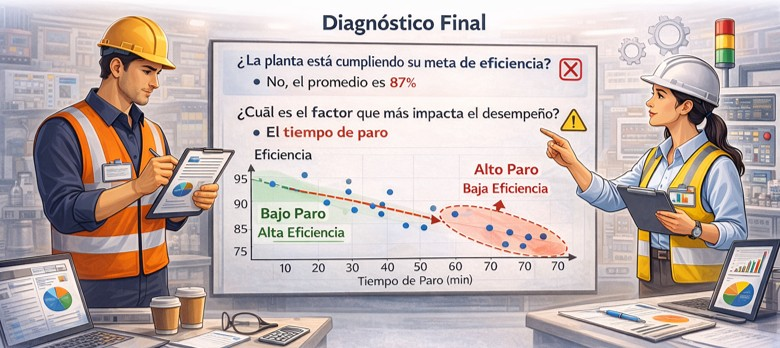

####**7. Diagnóstico**

Ejecuta las siguientes líneas de código para la **calcular y visualizar algunos indicadores importantes para el diagnóstico**. El código incluye comentarios explicativos para facilitar su comprensión.

In [ ]:
print("\n==============================================")
print("   TALLER: ¿ESTÁ FUNCIONANDO MI FÁBRICA?")
print("==============================================")

print("\n📌 DIAGNÓSTICO INTEGRAL")

# Calcular promedios de los principales indicadores
ef_prom = data["Eficiencia (%)"].mean()
paro_prom = data["Tiempo_Paro"].mean()
TasDef_prom = data["Tasa_Defectos (%)"].mean()

# Mostrar resultados promedio
print(f"\nEficiencia promedio: {ef_prom:.2f}%")
print(f"Tiempo de paro promedio: {paro_prom:.2f} min")
print(f"Tasa de defectos promedio: {TasDef_prom:.2f}%")

# Evaluar si se cumple la meta de eficiencia (95%)
if ef_prom < 95:
    print("\n⚠ La planta NO cumple la meta de eficiencia (95%).")
else:
    print("\n✅ La planta cumple la meta establecida.")

# Mostrar indicadores del modelo estadístico
print("\n📊 Análisis de relación estadística:")
print(f"R² del modelo: {r2:.2f}")                # Qué tan fuerte es la relación
print(f"Pendiente del modelo: {m:.2f}")          # Dirección de la relación

# Interpretar la pendiente
if m < 0:
    print("Existe una relación negativa: mayor tiempo de paro reduce la eficiencia.")

# Conclusión principal
print("\n🎯 Causa principal identificada:")
print("El tiempo de paro impacta directamente el desempeño del sistema.")

# Recomendación estratégica final
print("\n🛠 Recomendación estratégica:")
print("Reducir el tiempo de paro debe ser la prioridad operativa.")

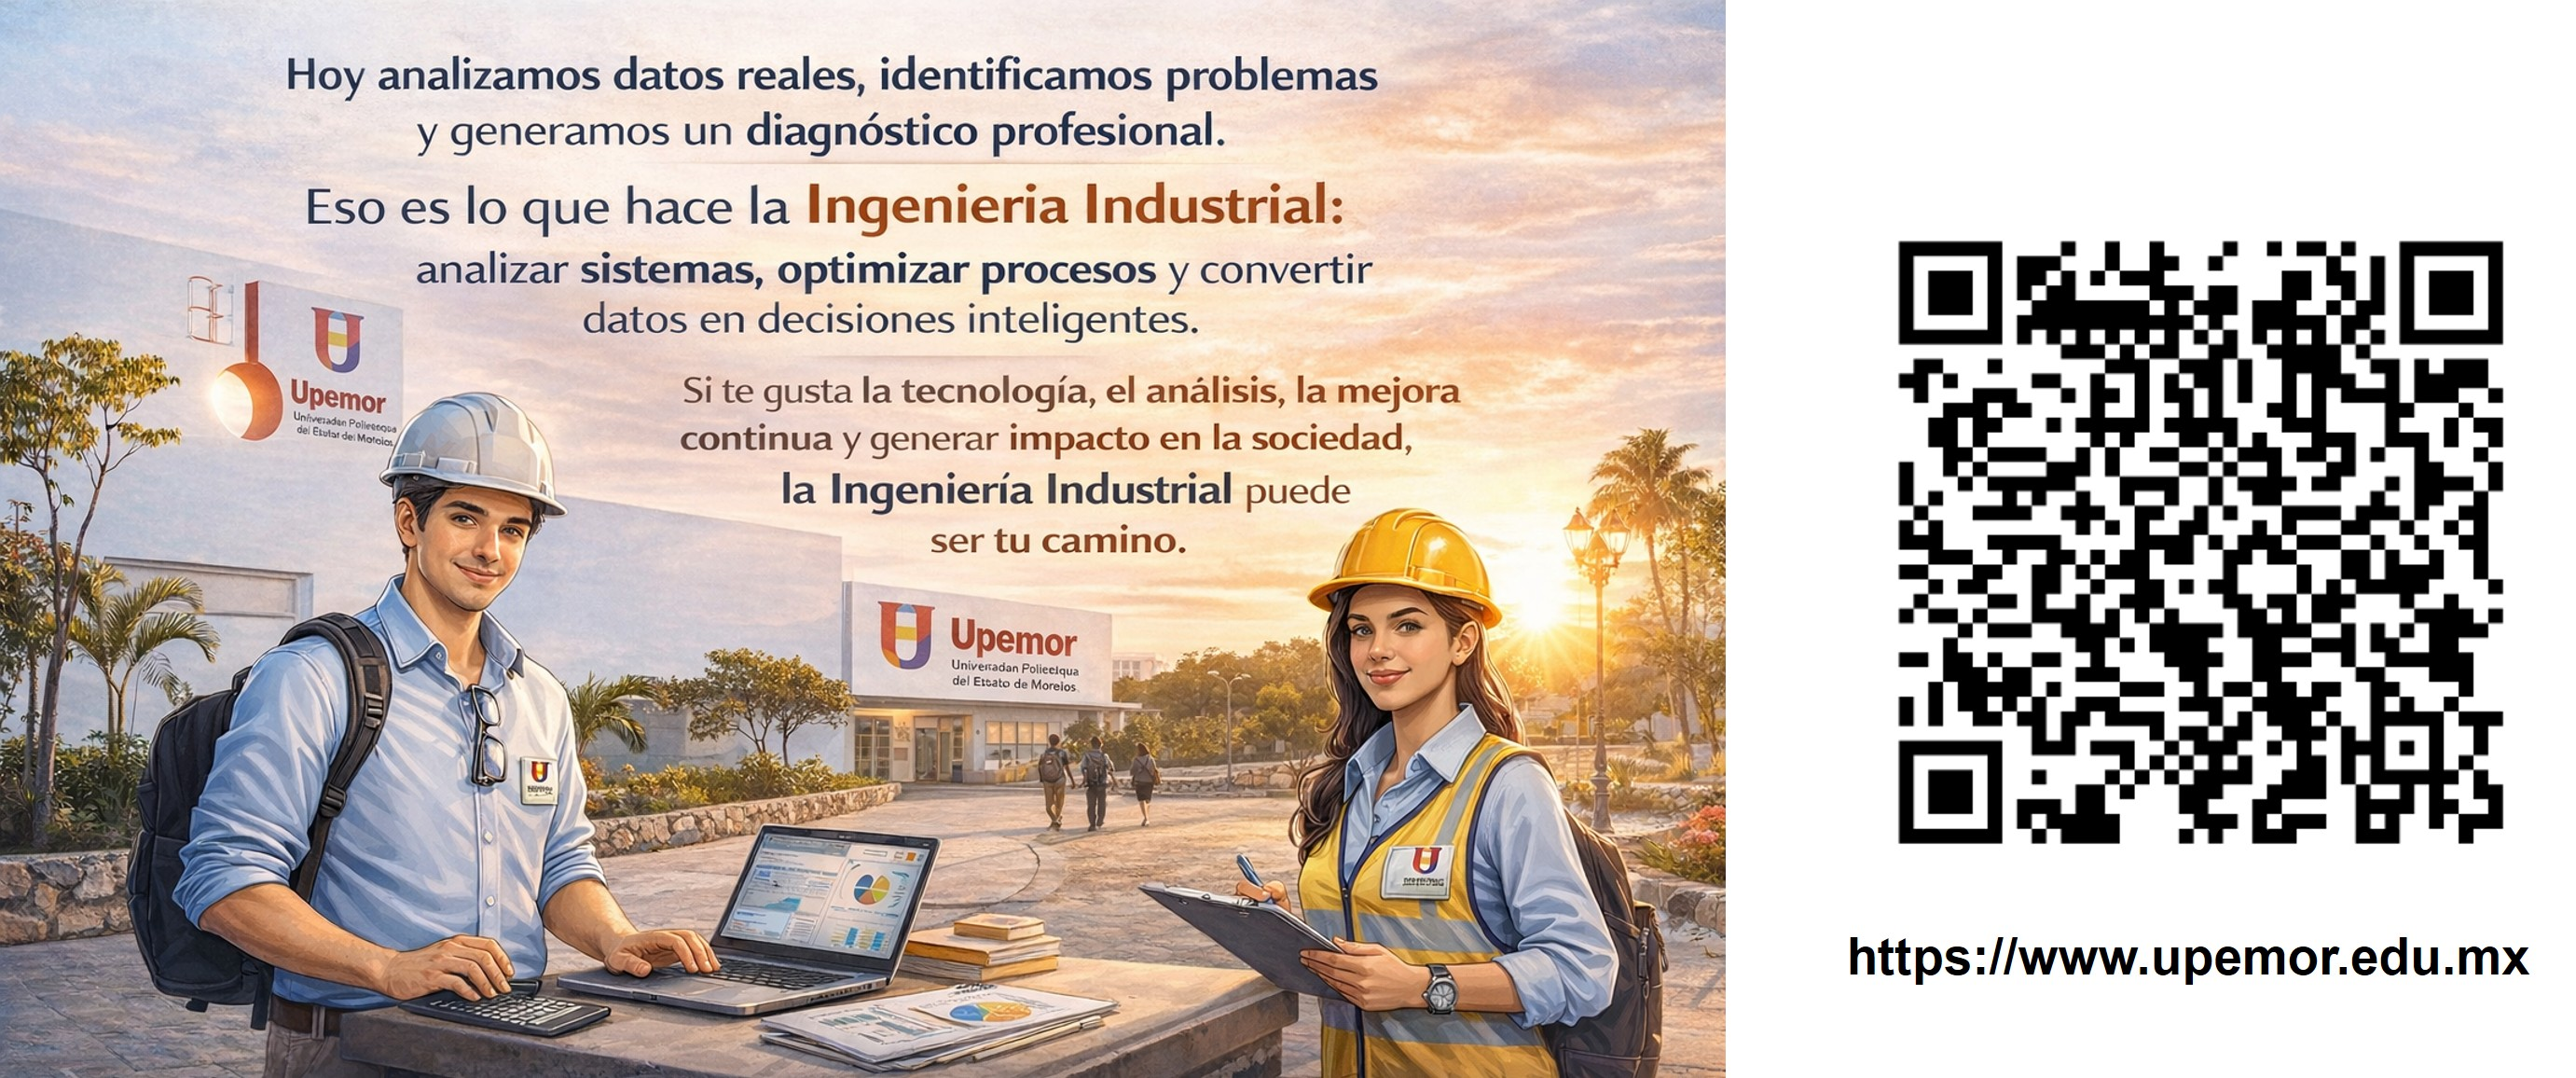